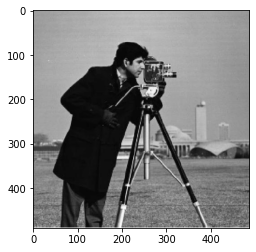

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
img_0 = plt.imread("The-original-cameraman-image.png")
plt.imshow(img_0)

In [8]:
def convert_rgb_to_gray_level(im_1): 
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range (m):
        for j in range(n):
            im_2[i,j] = get_distance(im_1[i,j,:])
    return im_2

def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c = v[0], v[1], v[2]
    w1,w2,w3 = w[0],w[1],w[2]
    return ((a**2) * w1 + (b**2) * w2 + ((c**2) * w3))**.5

def get_default_mask_for_mean(): # 3x3 matris oluşturur
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image * mask))


    

In [12]:
block_1 = np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
print(block_1)
print(sum(block_1))
print(sum(sum(block_1)))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[0.33333333 0.33333333 0.33333333]
1.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f7c8018d4c0>)

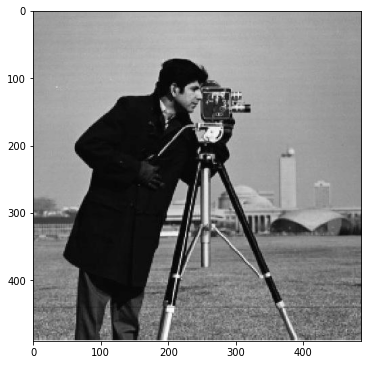

In [19]:
im_1 = mpimg.imread("The-original-cameraman-image.png")
im_2 = convert_rgb_to_gray_level(im_1)

%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1), plt.imshow(im_1)

In [53]:
def get_median_for_55(poi):
    s_1 = poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
    
def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]
    

In [54]:
def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range(3,n-3):
        for j in range(3,m-3):
            
            poi = im_2[i-1:i+2,j-1:j+2]
            
            im_2[i,j] = get_median(poi)
    return im_2

In [55]:
i,j = 10,10
poi_100 = im_1[i-2:i+3,j-2:j+3]
poi_100

array([[[0.6313726 , 0.6313726 , 0.6313726 , 1.        ],
        [0.6313726 , 0.6313726 , 0.6313726 , 1.        ],
        [0.62352943, 0.62352943, 0.62352943, 1.        ],
        [0.62352943, 0.62352943, 0.62352943, 1.        ],
        [0.62352943, 0.62352943, 0.62352943, 1.        ]],

       [[0.6156863 , 0.6156863 , 0.6156863 , 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ]],

       [[0.6156863 , 0.6156863 , 0.6156863 , 1.        ],
        [0.6156863 , 0.6156863 , 0.6156863 , 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ]],

       [[0.6156863 , 0.6156863 , 0.6156863 , 1.        ],
        [0.60784316, 0.60784316, 0.60784316, 1.        ],
        

In [56]:
apply_mask(im_2[1:4,1:4])

0.6122004588445027

In [57]:
im_55 = get_mean_filter_for_55(im_2)
plt.subplot(1,2,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_55,cmap='gray')

ValueError: cannot reshape array of size 6 into shape (1,9)